---
## **To-Do List (for training models)**

**1.** Import needed libraries  
**2.** Load the dataset  
**3.** Data Analysis, Preparation, Preprocessing  
**4.** Model Creation  
**5.** Model Training  
**6.** Prediction (with test-data)  
**7.** Model Evaluation  
**8.** Plot  

---

---
### **Regularization & PreProcessing Experiment**

No regularization, No preprocessing:
- auc_score = 0.85931
- accuracy = 0.7969

MinMaxScaler, No Regularization:
- auc_score = 0.84950
- accuracy - 0.77604

MinMaxScaler, Regularization -> C=1000:
- auc_score = 0.85980
- accuracy - 0.80208

StandartScaler, No Regularization:
- auc_score = 0.85955
- accuracy - 0.80208

StandartScaler, Regularization -> C=10:
- auc_score = 0.85980
- accuracy - 0.80208
---

In [1]:
import pandas as pd
data = pd.read_csv("datasets/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x = data.drop('Outcome',axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(C=10, max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# To calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# To report a lot of usefull measurements: 'precision', 'recall', 'f1-score', 'support', etc.
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# To build confusion matrix of the trained model
conf_mtrx = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_mtrx)

Accuracy:  0.8020833333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192


Confusion Matrix:
 [[118  12]
 [ 26  36]]


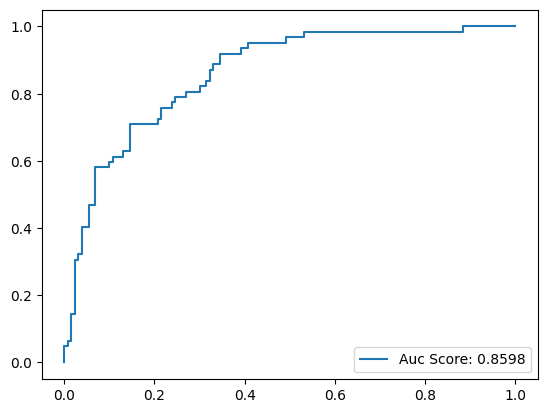

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 'predict' returns '0' or '1' after classification. It is good enough but for plotting we want much precise values
# 'predict_proba' returns the actual prediction values. Not just '1' or '0'. Examples: '0.95634', '0.00235', etc.
# It helps to visualize the more clearer plot of the performance of the model

y_pred_proba = model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"Auc Score: {round(auc, 5)}")
plt.legend(loc=4)
plt.style.use("dark_background")
plt.show()